### Making a dataset with bcolz array

This code is based on **Sam Witteveen's work** (*Making Celeb Faces Data Sets-50k-Presentation-Final*) with slight modifications.

The purpose of this code is to do preprocessing and preparation of a large set of images converting them to numpy arrays which can then be saved as a bcolz array (an efficient importing dataset).

The code below is used to create 3 dataset of different image resolution : 22 x 22, 44 x 44 and 176 x 176. 

Since it takes a lot of amount of memory to process a single dataset, the code is run 3 times with different image resolution value. Below is example of the code with image resolution 176 x 176.

The input dataset is from http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html using celebA dataset. 

In [1]:
%matplotlib inline
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import keras
import keras.backend as K

import random
import glob
import pickle
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array

from resizeimage import resizeimage
from scipy.misc import imsave

import bcolz
import threading
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
from time import sleep

Using TensorFlow backend.


### Setting the Path and Filenames

Get the file names from the direcctory and then save it as a list.

In [2]:
#The dir that has the images we want to put into the array
DATA_PATH = 'D:/Desktop/img_align_celeba/'

# Save image filenames
fnames = list(glob.iglob(DATA_PATH+'*.jpg'))
fnames.sort()
pickle.dump(fnames, open(DATA_PATH+'fnamesfullpath.p', 'wb'))
fnames = pickle.load(open(DATA_PATH+'fnamesfullpath.p', 'rb'))
fnames = fnames[0:50000]

### Put images into a bcolz array

In [3]:
#bcolz directories
bcolz_file_path = 'dataset_44_bc'

# width and height image to be resized to
NEW_SIZE = 44 

Create the bcolz array and allocate the memory

In [4]:
arr_hr = bcolz.carray(np.empty((0, NEW_SIZE, NEW_SIZE, 3), 'float32'), chunklen=16, mode='w', rootdir=bcolz_file_path)

#Pre-allocate memory
tl = threading.local()
tl.place = np.zeros((NEW_SIZE, NEW_SIZE, 3), 'uint8')

### Defines the function to make bcolz array

We pass in the pre-initialized bcolz array and the filenames

In [5]:
def make_bcolz(arr,fnames):
    for name in fnames:
        # Open the image
        img = Image.open(name)
        # Resize
        cover = resizeimage.resize_cover(img, [NEW_SIZE, NEW_SIZE])
        # Convert to numpy array
        a = np.asarray(cover)
        arr.append(a)

In [6]:
make_bcolz(arr_hr,fnames)

#flush saves it all to disk
arr_hr.flush()

In [7]:
# Check the shape
arr_hr.shape

(50000, 44, 44, 3)

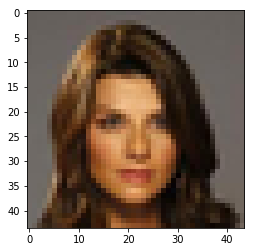

In [8]:
imgplot = plt.imshow(arr_hr[33]/255.)

For visualization, here is our example of dataset of different resolutions

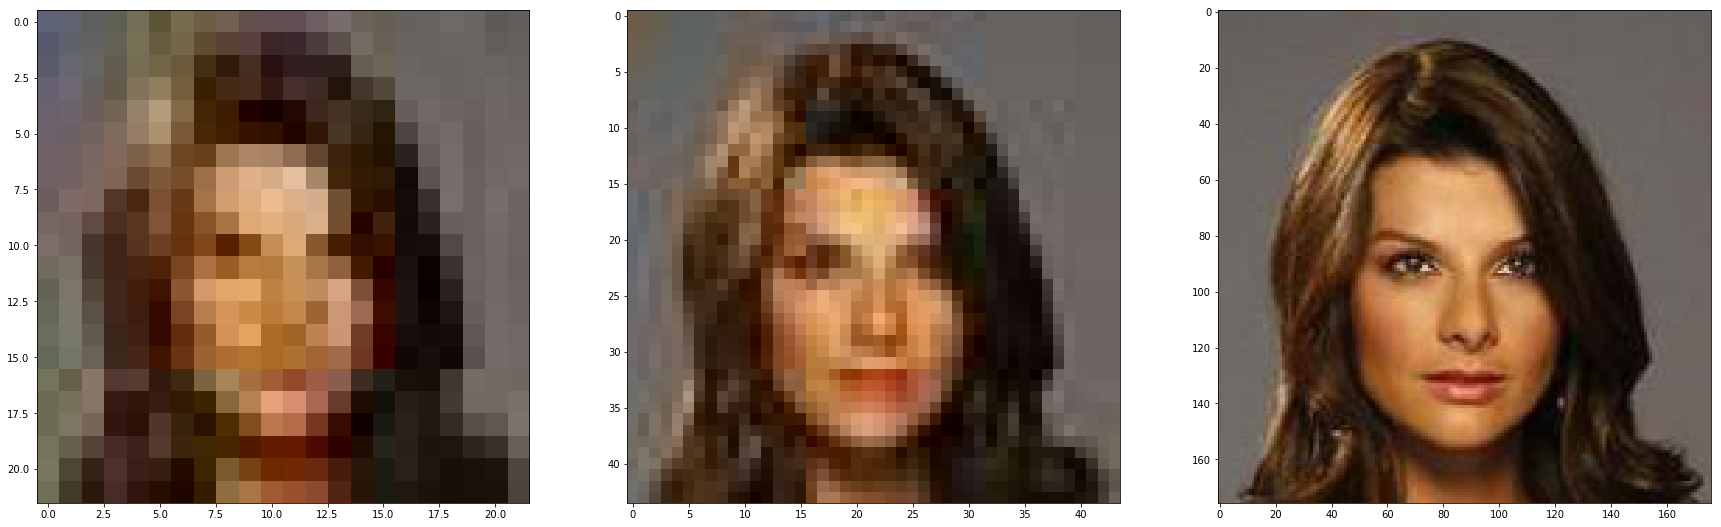

In [9]:
# for comparisons of one of the image with different resolutions
img1 = Image.open('img_33_22.jpg')
img2 = Image.open('img_33_44.jpg')
img3 = Image.open('img_33_176.jpg')

def compare_pics(x,y,z):
    fig = plt.figure(figsize=(30,30))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(x)
    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(y)
    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(z)
    
compare_pics(img1, img2, img3)